<a href="https://colab.research.google.com/github/faranak5171/Computer-Vision-Projects/blob/main/basic/Image_Processing_Methods2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

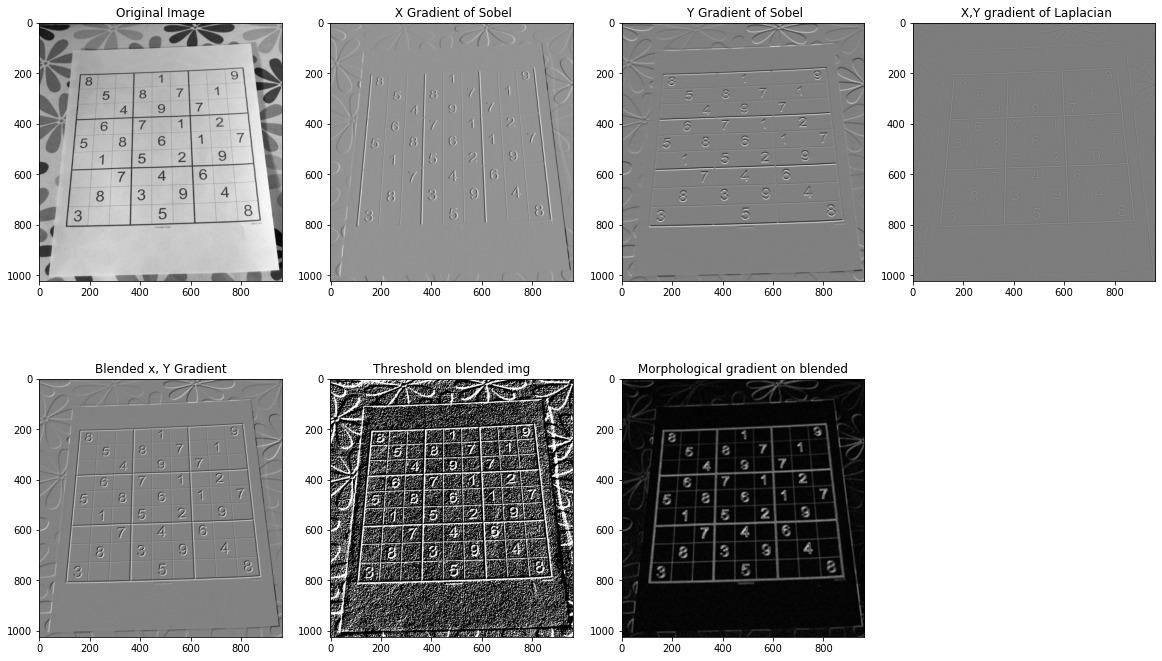

In [17]:
fig = plt.figure(figsize=(20,12))
rows = 2
cols = 4

def display_img(num, img, title):
  ax = fig.add_subplot(rows, cols, num)
  ax.imshow(img, cmap='gray')
  ax.set_title(title)

img = cv2.imread('sudoku.jpg',0)
display_img(1,img, 'Original Image')

# Calculate X gradient sobel
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
display_img(2, sobelx, ' X Gradient of Sobel')

# Calculate Y Gradient Sobel
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
display_img(3, sobely, ' Y Gradient of Sobel')

# Calculate X and Y gradient - Using Laplace and derivatives
laplacian = cv2.Laplacian(img, cv2.CV_64F)
display_img(4, laplacian, ' X,Y gradient of Laplacian')

# Blend X and Y Gradient
blended = cv2.addWeighted(src1=sobelx, alpha= 0.5, src2=sobely, beta=0.5, gamma=0)
display_img(5, blended, 'Blended x, Y Gradient')

# Threshold filter
ret, th1 = cv2.threshold(blended, 50, 255, cv2.THRESH_BINARY)
display_img(6, th1, 'Threshold on blended img')

# Morphological gradient on blended
kernel = np.ones((4,4), dtype=np.uint8)
morph = cv2.morphologyEx(blended, cv2.MORPH_GRADIENT, kernel)
display_img(7, morph, 'Morphological gradient on blended')